<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/Modelo_entrenado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.
CPU times: user 115 ms, sys: 25.8 ms, total: 140 ms
Wall time: 8.81 s


In [ ]:
%%time
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=48841273f4ad5932109a5df147863c53b53cea4fb4bdaf6535387741253c3b58
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-qiytayph/pycocotools_8c9d1119bb5f4933b0b7d5cdf391ac9b
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-qiytayph/pycocotools_8c9d1119bb5f4933b0b7d5cdf391ac9b
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263850 sha256=8b19526e8cfab27bd55a64769644233dc9b356f1c9851be6d53cad61d8867a45
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
#recuperar pesos entrenados
!mkdir '/trained'

El nombre del archivo donde se guardaron nuestros pesos tiene el nombre signatrix_efficientdet_coco seguido de la fecha en que se cargaron a Googel Drive y es el nombre que colocamos donde están los ## en las siguientes celdas

In [ ]:
!cp '/content/drive/MyDrive/##.onnx' '/trained/signatrix_efficientdet_coco.onnx'

In [ ]:
!cp '/content/drive/MyDrive/##.pth' '/trained/signatrix_efficientdet_coco.pth'

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
%%time
from train_detector import Detector

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 35 µs


In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#Nuestros pesos de modelos entrenados están aquí en formato onxx
gtf.Model(model_dir="/trained")

In [ ]:
#Descargar el conjunto de prueba del conjunto de datos
!curl -L "ENLACE" | jar -x

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1511      0 --:--:-- --:--:-- --:--:--  1511
 99 68.8M   99 68.8M    0     0  47.6M      0  0:00:01  0:00:01 --:--:--  149M
curl: (23) Failed writing body (1309 != 8192)


In [ ]:
%%time
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])


CPU times: user 80.2 ms, sys: 5.92 ms, total: 86.1 ms
Wall time: 91 ms


In [ ]:
class_list

['vehicles', 'Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.199s)
CPU times: user 245 ms, sys: 37.2 ms, total: 283 ms
Wall time: 281 ms


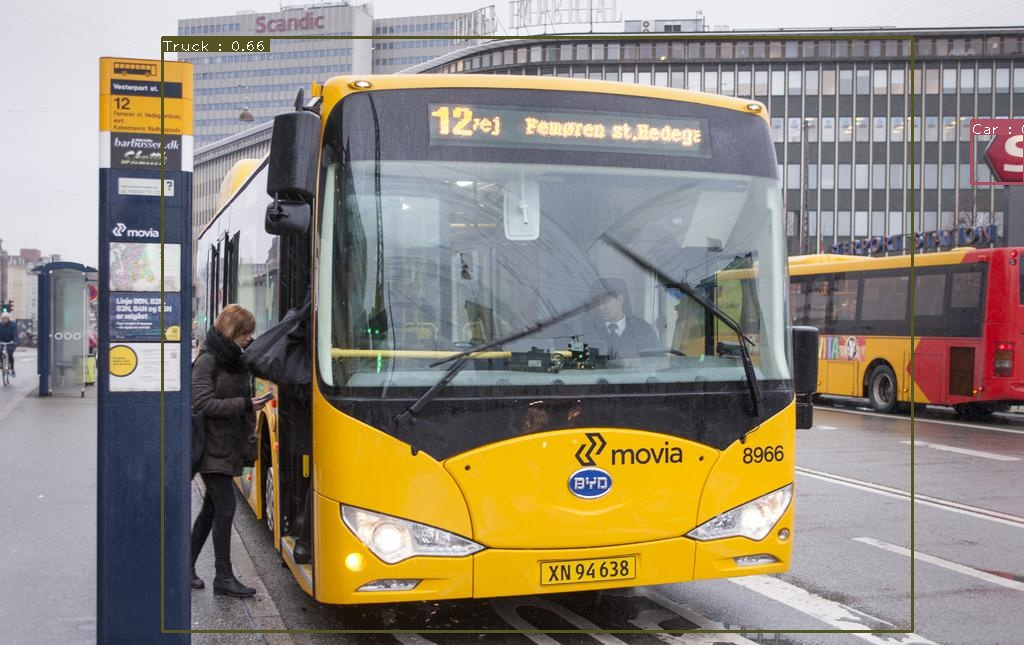

In [ ]:
from IPython.display import Image
Image(filename='output.jpg')